In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gibbs_sampling import sample_z
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLarsIC

In [23]:
df = pd.read_csv('Data/macro1.csv')
df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx
0,Transform:,5.0,5.0,5.000,5.000000,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.00,6.00,6.00,2.0,6.0,6.0,6.0,6.0,1.0
1,01/01/1959,2289.8,2151.9,18.191,253747.578885,18234.44037,21.9289,21.5499,20.9407,28.4830,...,12.133,2.13,2.45,2.04,NaN,274.9,6476.0,12298.0,84.2,NaN
2,02/01/1959,2299.6,2160.2,18.380,255653.461901,18368.21974,22.3584,21.8408,21.1221,28.6919,...,12.149,2.13,2.46,2.05,NaN,276.0,6476.0,12298.0,83.5,NaN
3,03/01/1959,2314.4,2176.1,18.555,254743.765035,18521.70306,22.6805,21.9730,21.2257,28.6919,...,12.169,2.15,2.45,2.07,NaN,277.4,6508.0,12349.0,81.6,NaN
4,04/01/1959,2328.5,2190.3,18.488,259878.438046,18533.11060,23.1636,22.2903,21.5367,29.1445,...,12.211,2.16,2.47,2.08,NaN,278.1,6620.0,12484.0,81.8,NaN


In [24]:
# We remove the first row
df = df.iloc[1:]

In [25]:
# We compute the GrowthRate using 'INDPRO', the index corresponding to the Total industrial production.
df['sasdate'] = pd.to_datetime(df['sasdate'], format='%m/%d/%Y')
df['GrowthRate_INDPRO'] = df['INDPRO'].pct_change() * 100

In [26]:
df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx,GrowthRate_INDPRO
1,1959-01-01,2289.8,2151.9,18.191,253747.578885,18234.44037,21.9289,21.5499,20.9407,28.4830,...,2.13,2.45,2.04,NaN,274.9,6476.0,12298.0,84.2,NaN,NaN
2,1959-02-01,2299.6,2160.2,18.380,255653.461901,18368.21974,22.3584,21.8408,21.1221,28.6919,...,2.13,2.46,2.05,NaN,276.0,6476.0,12298.0,83.5,NaN,1.958603
3,1959-03-01,2314.4,2176.1,18.555,254743.765035,18521.70306,22.6805,21.9730,21.2257,28.6919,...,2.15,2.45,2.07,NaN,277.4,6508.0,12349.0,81.6,NaN,1.440622
4,1959-04-01,2328.5,2190.3,18.488,259878.438046,18533.11060,23.1636,22.2903,21.5367,29.1445,...,2.16,2.47,2.08,NaN,278.1,6620.0,12484.0,81.8,NaN,2.130024
5,1959-05-01,2342.5,2205.6,18.710,261691.222172,18678.29753,23.5125,22.4754,21.7441,29.2838,...,2.17,2.48,2.08,95.3,280.1,6753.0,12646.0,80.7,NaN,1.506243


In [27]:
# We remove the features in which there are a lot of Nan values
pd.DataFrame(df.isna().sum()).sort_values(0, ascending=False).iloc[:10]

,0
ACOGNO,398
TWEXMMTH,168
UMCSENTx,154
ANDENOx,109
VXOCLSx,42
PERMITW,12
PERMITS,12
PERMITMW,12
PERMITNE,12
PERMIT,12


In [28]:
columns_to_drop = ['ACOGNO', 'TWEXMMTH', 'UMCSENTx', 'ANDENOx', 'VXOCLSx']
df = df.drop(columns_to_drop,axis=1)

In [29]:
# We remove the remaining NaN values
df = df.dropna()

In [30]:
# We reorder the columns
columns = df.columns.tolist()
new_column_order = ['sasdate', 'GrowthRate_INDPRO'] + [column for column in columns if column not in ['sasdate', 'GrowthRate_INDPRO']]
df = df[new_column_order]

In [31]:
df.head()

,sasdate,GrowthRate_INDPRO,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,...,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST
13,1960-01-01,2.625412,2391.2,2252.3,18.910,263212.787497,18762.29853,24.1298,23.3215,22.6512,...,54.611,20.000,12.502,2.22,2.57,2.13,286.7,7362.0,14063.0,75.5
14,1960-02-01,-0.889771,2392.8,2253.8,18.993,267039.890455,18831.78084,23.9151,23.1893,22.5734,...,54.700,20.001,12.522,2.23,2.59,2.14,287.0,7396.0,14144.0,73.3
15,1960-03-01,-0.897759,2397.2,2255.4,19.262,259610.179810,18811.03986,23.7004,23.1100,22.5475,...,54.540,20.037,12.529,2.24,2.69,2.14,287.8,7456.0,14239.0,71.5
16,1960-04-01,-0.792814,2405.6,2263.4,19.560,262179.545533,19304.67539,23.5125,23.1629,22.5734,...,54.606,20.163,12.555,2.24,2.61,2.14,288.3,7582.0,14413.0,71.5
17,1960-05-01,-0.113982,2411.7,2269.4,19.166,254056.886617,19016.37565,23.4857,23.2951,22.7289,...,54.600,20.154,12.590,2.24,2.64,2.14,289.1,7673.0,14559.0,71.7


In [32]:
# We remove the INDPRO column as we now have our Growth rate
df.pop('INDPRO')
'INDPRO' in df.columns

False

In [33]:
num_predictors = len(df.columns) - 2
num_predictors

120

In [34]:
# We initialize the parameters for the Gibbs
a, b, A, B = 1, 1, 1, 1 # Parameters for Beta laws
q = np.random.beta(a, b, 1)[0]
R_2 = np.random.beta(A, B, 1)[0]

start = np.arange(0, 0.1 + 0.001, 0.001)[1:]
mid = np.arange(0.11, 0.9 + 0.01, 0.01)
end = np.arange(0.901, 1 + 0.001, 0.001)[:-1]
support = np.concatenate((start, mid, end))

In [35]:
# We define the outcome y and the predictors X
X = df.drop(['sasdate', 'GrowthRate_INDPRO'], axis=1)
y = df['GrowthRate_INDPRO']

In [36]:
# We initialize our z using Lasso Regression.
# First, we need to find the best regularization term using Bayesian Criterion (BIC)
lasso_ic_model = LassoLarsIC(criterion='bic')
lasso_ic_model.fit(X, y)
best_alpha_bic = lasso_ic_model.alpha_

C:\Users\bapti\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_least_angle.py:678: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 235 iterations, alpha=8.814e-04, previous alpha=8.814e-04, with an active set of 96 regressors.
  warnings.warn(


In [37]:
best_alpha_bic

2.2369241630556895

C:\Users\bapti\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.597e+01, tolerance: 3.806e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\bapti\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.604e+01, tolerance: 3.806e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\bapti\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

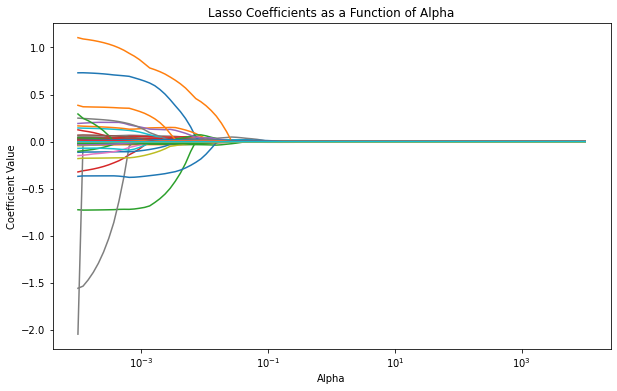

In [57]:
alphas = np.logspace(-4, 4, 100)
coefs = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X, y)
    coefs.append(lasso_model.coef_)

# Tracer la courbe de validation
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients as a Function of Alpha')
plt.show()

C:\Users\bapti\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.507e+01, tolerance: 3.045e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\bapti\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.514e+01, tolerance: 3.045e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\bapti\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

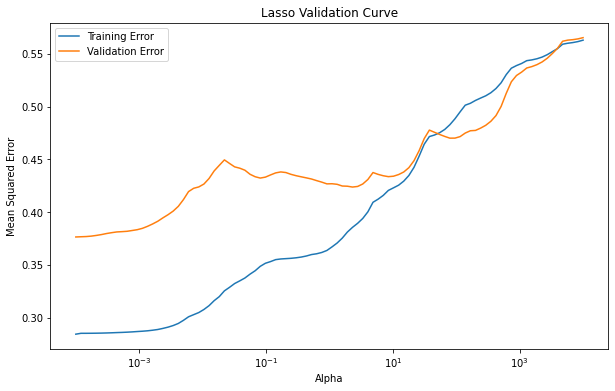

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alphas = np.logspace(-4, 4, 100)
train_errors = []
validation_errors = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)  # Supposons que X_train et y_train soient vos données d'entraînement
    y_pred_train = lasso_model.predict(X_train)
    y_pred_validation = lasso_model.predict(X_test)  # Supposons que X_validation soit votre ensemble de validation
    
    train_errors.append(mean_squared_error(y_train, y_pred_train))  # Vous pouvez utiliser une autre métrique de performance
    validation_errors.append(mean_squared_error(y_test, y_pred_validation))

# Tracer la courbe de validation
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Training Error')
plt.plot(alphas, validation_errors, label='Validation Error')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')  # Utilisez la métrique de performance appropriée
plt.legend()
plt.title('Lasso Validation Curve')
plt.show()

In [62]:
# Now, we run the Lasso Regression using our best regularization term.
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X, y)
beta_estimates = lasso_model.coef_

C:\Users\bapti\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e+02, tolerance: 3.806e-02
  model = cd_fast.enet_coordinate_descent(


In [63]:
z_initial = (np.abs(beta_estimates) > 0).astype(int)

In [64]:
z_initial

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [21]:
sample_z(Y=y, X=X, q_start=q, R_2_start=R_2, num_iterations=1, z=z_initial, support=support)

c:\Users\bapti\OneDrive\Bureau\GitHub\bayesian_statistics_project\gibbs_sampling.py:80: RuntimeWarning: invalid value encountered in double_scalars
  p = 1 / (1 + ( ((gamma_2**0.5)*(1-q)) / q ) * (np.linalg.det(W_tilde_inv_0)/np.linalg.det(W_tilde_inv))**(0.5)
c:\Users\bapti\OneDrive\Bureau\GitHub\bayesian_statistics_project\gibbs_sampling.py:80: RuntimeWarning: invalid value encountered in double_scalars
  p = 1 / (1 + ( ((gamma_2**0.5)*(1-q)) / q ) * (np.linalg.det(W_tilde_inv_0)/np.linalg.det(W_tilde_inv))**(0.5)
c:\Users\bapti\OneDrive\Bureau\GitHub\bayesian_statistics_project\gibbs_sampling.py:80: RuntimeWarning: invalid value encountered in double_scalars
  p = 1 / (1 + ( ((gamma_2**0.5)*(1-q)) / q ) * (np.linalg.det(W_tilde_inv_0)/np.linalg.det(W_tilde_inv))**(0.5)
c:\Users\bapti\OneDrive\Bureau\GitHub\bayesian_statistics_project\gibbs_sampling.py:80: RuntimeWarning: invalid value encountered in double_scalars
  p = 1 / (1 + ( ((gamma_2**0.5)*(1-q)) / q ) * (np.linalg.det(W_tild

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# We now run the Gibbs sampler in order to obtain our z and select the regressors
z_final = sample_z(Y=y, X=X, q_start=q, R_2_start=R_2, num_iterations=1000, z=z_initial)

In [ ]:
from statistics import median
median_q_dataset_of_dataset = []
R_y_list = [0.05, 0.25, 0.5]
comptage = 4

for R_y in R_y_list :
    median_q_dataset = []
    for i in range(100):
        start = time.time()
        median_q_dataset.append(np.median(generate_dataset(10, R_y)))
        end = time.time()
        print("Time of execution =",((end-start)//60), "m", (((end-start)%60)//1), "; s=", 10, " Ry=", R_y, " iteration:", i)
    file_name = 'list_of_median_' + str(comptage) +'.csv'
    pd.DataFrame(np.array(median_q_dataset)).to_csv(file_name)
    median_q_dataset_of_dataset.append(median_q_dataset)
    comptage += 1